# Factorial

En estos apuntes se observará como implementar el factorial de distintas formas, y como cada implementación tiene un impacto en su tiempo de ejecución.

## Primera aproximación

La definición del factorial es
$$
n! = 1 \times 2 \times 3 \times 4 \times \cdots \times n
$$
La implementación es directa

In [1]:
def fact_v1(n):
    f = 1
    for i in range(1,n+1):
        f *= i
    return f

## Segunda aproximación

Se realizará un ejercicio de reordenamiento de términos para conseguir formas más eficientes en términos de cómputo. Empieza con $n=4$ porque para valores anteriores no había mucho para reordenar.<br>
Para $n = 4$:
$$
4! = 1 \times 2 \times 3 \times 4 = (1 \times 3)(2 \times 4) = (1 \times 3)((2 \times 1)(2 \times 2)) = (1 \times 3) \times 2^{2} \times 2!
$$

Para $n = 5$:
$$
5! = 1 \times 2 \times 3 \times 4 \times 5 = (1 \times 3 \times 5)(2 \times 4) = (1 \times 3 \times 5)((2 \times 1)(2 \times 2)) = (1 \times 3 \times 5) \times 2^{2} \times 2!
$$

Para $n = 6$:
$$
6! = 1 \times 2 \times 3 \times 4 \times 5 \times 6 = (1 \times 3 \times 5)(2 \times 4 \times 6) = (1 \times 3 \times 5)((2 \times 1)(2 \times 2)(2 \times 3)) = (1 \times 3 \times 5) \times 2^{3} \times 3!
$$

Para $n = 7$:
$$
7! = 1 \times 2 \times 3 \times 4 \times 5 \times 6 \times 7 = (1 \times 3 \times 5 \times 7)(2 \times 4 \times 6) = (1 \times 3 \times 5 \times 7)((2 \times 1)(2 \times 2)(2 \times 3)) = (1 \times 3 \times 5 \times 7) \times 2^{3} \times 3!
$$

En general:
$$
n! = (1 \times 3 \times 5 \cdots)(2^{n \div 2})(n \div 2!)
$$

Notar que el primer producto son los impares menores o iguales a $n$, y que $\div$ es el símbolo de la división entera.

In [2]:
def fact_v2(n):
    f = 1
    t = n//2
    m = (n+1)//2
    for i in range(1,2*m,2):
        f *= i
    p = 2 ** t
    return f*p*fact_v1(t)

Está forma hace uso de la primera versión, es decir, la definición.

## Tercera aproximación

Se continuará con la deducción de la aproximación anterior, pero sin depender de la primera versión.

Para $n = 8$:

$$
8! = (1 \times 3 \times 5 \times 7)(2 \times 4 \times 6 \times 8) = (1 \times 3 \times 5 \times 7)((2 \times 1)(2 \times 2)(2 \times 3)(2 \times 4)) = (1 \times 3 \times 5 \times 7) \times 2^{4} \times 4! 
$$

Al reemplazar el resultado de $4!$:
$$
8! = (1 \times 3 \times 5 \times 7) \times 2^{4} \times 4! = (1 \times 3 \times 5 \times 7) \times 2^{4} \times ((1 \times 3) \times 2^{2} \times 2!)
$$

Después de ordenar:

$$
8! = (1 \times 3 \times 5 \times 7)(1 \times 3)\times 2^{4} \times 2^{2} \times 2!
$$

Si le damos forma a $2! = 1 \times 2^{1} \times 1!$ queda:

$$
8! = (1 \times 3 \times 5 \times 7)(1 \times 3)(1) \times 2^{4} \times 2^{2} \times 2^{1} \times 1!
$$

Para $n = 9$:

$$
9! = (1 \times 3 \times 5 \times 7 \times 9)(2 \times 4 \times 6 \times 8) = (1 \times 3 \times 5 \times 7 \times 9)((2 \times 1)(2 \times 2)(2 \times 3)(2 \times 4)) = (1 \times 3 \times 5 \times 7 \times 9) \times 2^{4} \times 4! 
$$

Al reemplazar el resultado de $4!$:
$$
9! = (1 \times 3 \times 5 \times 7 \times 9) \times 2^{4} \times 4! = (1 \times 3 \times 5 \times 7 \times 9) \times 2^{4} \times ((1 \times 3) \times 2^{2} \times 2!)
$$

Nos queda:

$$
9! = (1 \times 3 \times 5 \times 7 \times 9)(1 \times 3)(1) \times 2^{4} \times 2^{2} \times 2^{1} \times 1!
$$

Si agrupamos:

$$
9! = \underbrace{(1 \times 3 \times 5 \times 7 \times 9)(1 \times 3)(1)}_\text{a} \times \underbrace{2^{4} \times 2^{2} \times 2^{1}}_\text{b} \times 1!
$$

La expresión simbólica sería de el término $a$ sería:

$$
a = \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,9\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,9\div2\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,9\div4\right]$}
$$

La expresión simbólica sería de el término $b$ sería:

$$
b = 2^{9 \div 2} \times 2^{9 \div 4} \times 2^{9 \div 8}
$$

En general:

$$
a = \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,n\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,n\div2\right]$} \times \underbrace{\prod_{k}^{}(2k+1)}_\text{$k \in impares \left[0,n\div4\right]$} \times \cdots
$$

y:

$$
b = 2^{n \div 2} \times 2^{n \div 4} \times 2^{n \div 8} \times \cdots
$$

Y el factorial de cualquier número sería:

$$
n! = a \times b
$$

In [3]:
def fact_v3(n):
    a = 1
    b = 1
    while (n):
        ai = 1
        t = n//2
        m = (n+1)//2
        for i in range(1,2*m,2):
            ai *= i
        a *= ai
        b *= (2 ** t)
        n = t
    return a*b

El término $b$ se puede reemplazar por una única potencia de una suma de exponentes

In [4]:
def fact_v4(n):
    a = 1
    e = 0
    while (n):
        ai = 1
        t = n//2
        m = (n+1)//2
        for i in range(1,2*m,2):
            ai *= i
        a *= ai
        e += t
        n = t
    b = 2**e
    return a*b

Al ser una potencia de 2 se puede hacer otro cambio

In [5]:
def fact_v5(n):
    a = 1
    e = 0
    while (n):
        ai = 1
        t = n//2
        m = (n+1)//2
        for i in range(1,2*m,2):
            ai *= i
        a *= ai
        e += t
        n = t
    b = (2<<(e-1))
    return a*b

En estos apuntes quería evitar el uso de módulos auxiliares, pero no he podido evitar la curiosidad de ver que ocurre si empleo el método `prod` de la librería `math` y así evitar el bucle `for` que calcula los $a_{i}$. Sería simpático que `Python` tuviera a la mano una función `prod` que no dependa de `math`, como es el caso de las funciones `sum` y `pow`.

In [6]:
from math import prod

In [7]:
def fact_v6(n):
    a = 1
    e = 0
    while (n):
        t = n//2
        m = (n+1)//2
        a *= prod(range(1,2*m,2))
        e += t
        n = t
    b = (2<<(e-1))
    return a*b

## Pruebas

### Prueba numérica

In [8]:
r1 = []
r2 = []
r3 = []
r4 = []
r5 = []
r6 = []
start = 1000
end = 15000
step = start
nums = range(start,end+step,step)
for num in nums:
    r1.append(fact_v1(num))
    r2.append(fact_v2(num))
    r3.append(fact_v3(num))
    r4.append(fact_v4(num))
    r5.append(fact_v5(num))
    r6.append(fact_v6(num))

In [9]:
r1 == r2 == r3 == r4 == r5 == r6

True

Los resultados numéricos son iguales en todas las versiones, para todos los tamagnos.

### Medición de tiempos

Se realizarán 40 repeticiones por tamagno, y los tamagnos variarán desde 1000 hasta 15000 a pasos de 1000.

In [10]:
import time
import statistics
from utilities import filtro_mediana
import matplotlib.pyplot as plt

In [11]:
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
v6 = []
start = 1000
end = 15000
step = start
nums = range(start,end+step,step)
veces = range(40)

In [12]:
for num in nums:
    v1i = []
    v2i = []
    v3i = []
    v4i = []
    v5i = []
    v6i = []
    for _ in veces:
        tic = time.time()
        fact_v1(num)
        toc = time.time()
        v1i.append(toc - tic)
        
        tic = time.time()
        fact_v2(num)
        toc = time.time()
        v2i.append(toc - tic)
        
        tic = time.time()
        fact_v3(num)
        toc = time.time()
        v3i.append(toc - tic)
        
        tic = time.time()
        fact_v4(num)
        toc = time.time()
        v4i.append(toc - tic)
        
        tic = time.time()
        fact_v5(num)
        toc = time.time()
        v5i.append(toc - tic)
        
        tic = time.time()
        fact_v6(num)
        toc = time.time()
        v6i.append(toc - tic)
    v1.append(statistics.mean(filtro_mediana(v1i, 15)))
    v2.append(statistics.mean(filtro_mediana(v2i, 15)))
    v3.append(statistics.mean(filtro_mediana(v3i, 15)))
    v4.append(statistics.mean(filtro_mediana(v4i, 15)))
    v5.append(statistics.mean(filtro_mediana(v5i, 15)))
    v6.append(statistics.mean(filtro_mediana(v6i, 15)))

### Tiempo promedio

In [13]:
import matplotlib.pyplot as plt

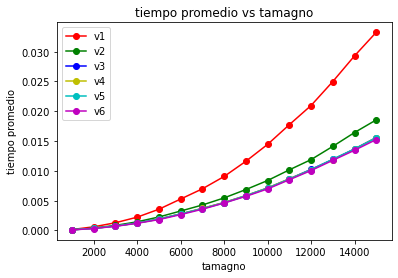

In [14]:
plt.plot(nums,v1,'r-o',label='v1')
plt.plot(nums,v2,'g-o',label='v2')
plt.plot(nums,v3,'b-o',label='v3')
plt.plot(nums,v4,'y-o',label='v4')
plt.plot(nums,v5,'c-o',label='v5')
plt.plot(nums,v6,'m-o',label='v6')
plt.xlabel('tamagno')
plt.ylabel('tiempo promedio')
plt.title('tiempo promedio vs tamagno')
plt.legend()

No se observa una ganancia significativa entre las versiones 3, 4, 5 y 6.

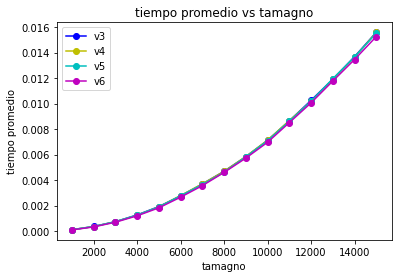

In [15]:
plt.plot(nums,v3,'b-o',label='v3')
plt.plot(nums,v4,'y-o',label='v4')
plt.plot(nums,v5,'c-o',label='v5')
plt.plot(nums,v6,'m-o',label='v6')
plt.xlabel('tamagno')
plt.ylabel('tiempo promedio')
plt.title('tiempo promedio vs tamagno')
plt.legend()

### Speedup

In [16]:
spv2 = [v1[i]/v2[i] for i in range(len(v1))]
spv3 = [v1[i]/v3[i] for i in range(len(v1))]
spv4 = [v1[i]/v4[i] for i in range(len(v1))]
spv5 = [v1[i]/v5[i] for i in range(len(v1))]
spv6 = [v1[i]/v6[i] for i in range(len(v1))]

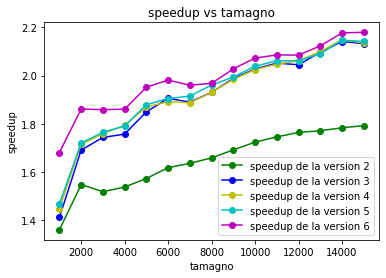

In [17]:
plt.plot(nums,spv2,'g-o',label='speedup de la version 2')
plt.plot(nums,spv3,'b-o',label='speedup de la version 3')
plt.plot(nums,spv4,'y-o',label='speedup de la version 4')
plt.plot(nums,spv5,'c-o',label='speedup de la version 5')
plt.plot(nums,spv6,'m-o',label='speedup de la version 6')
plt.xlabel('tamagno')
plt.ylabel('speedup')
plt.title('speedup vs tamagno')
plt.legend()

Cuando no se quiere usar librerías, la quinta forma parece ser, en términos generales, la opción ideal. Sin embargo, se puede apreciar que en los primeros tamaños la función `prod` de `math` tuvo regular impacto en el tiempo de ejecución, más a medida que el tamaño aumenta se va empatando con las otras implementaciones.

Se hará un acercamiento a los últimos casos (menos de la versión 2) para observar con más detalle

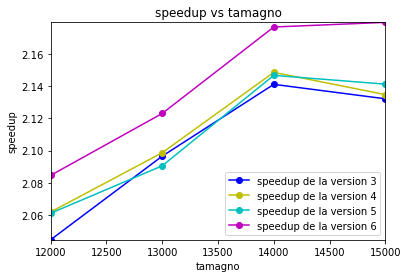

In [18]:
plt.plot(nums,spv3,'b-o',label='speedup de la version 3')
plt.plot(nums,spv4,'y-o',label='speedup de la version 4')
plt.plot(nums,spv5,'c-o',label='speedup de la version 5')
plt.plot(nums,spv6,'m-o',label='speedup de la version 6')
plt.xlabel('tamagno')
plt.ylabel('speedup')
plt.xlim([nums[-4],nums[-1]])
plt.ylim([spv3[-4],spv6[-1]])
plt.title('speedup vs tamagno')
plt.legend()

In [19]:
rap = max(spv6[-1],spv5[-1],spv4[-1],spv3[-1])

In [20]:
lent = min(spv6[-1],spv5[-1],spv4[-1],spv3[-1])

In [21]:
print("La implementación más rápida y más lenta en el último tamaño tienen una diferencia de {}".format(rap-lent))

La implementación más rápida y más lenta en el último tamaño tienen una diferencia de 0.04748724183174602


La diferencia obtenida no resulta tan atractiva como para motivar al uso de un módulo externo en el proceso de entender como la implementación afecta al tiempo de ejecución.